Estimated Largest Lyapunov Exponent: 4.5142744524031236e-07


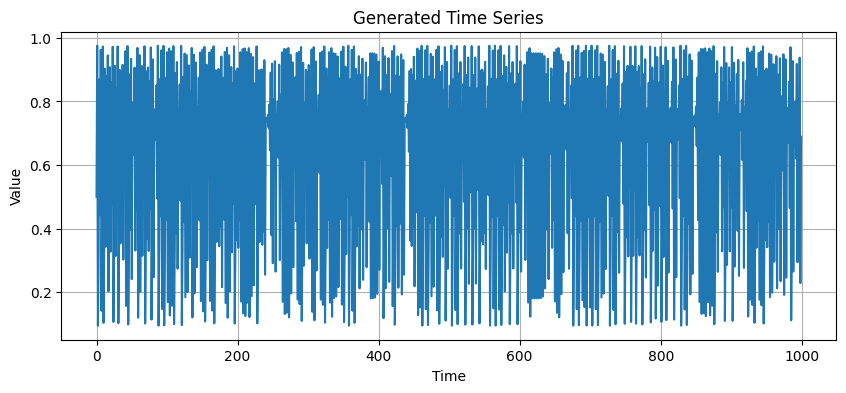

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def embed_time_series(data, m, tau):
    """Embed the time series into phase space."""
    n = len(data)
    embedded = np.array([data[i:i + m * tau:tau] for i in range(n - (m - 1) * tau)])
    return embedded

def nearest_neighbors(embedded):
    """Find nearest neighbors in the embedded space."""
    n = len(embedded)
    distances = np.zeros((n, n))
    
    # Calculate pairwise distances
    for i in range(n):
        for j in range(n):
            distances[i, j] = np.linalg.norm(embedded[i] - embedded[j])
    
    # Find nearest neighbor (excluding self)
    nn_indices = np.argsort(distances, axis=1)[:, 1]
    return nn_indices

def calculate_lyapunov_exponent(data, m=3, tau=1):
    """Calculate the largest Lyapunov exponent using Rosenstein's algorithm."""
    embedded = embed_time_series(data, m, tau)
    nn_indices = nearest_neighbors(embedded)
    
    n = len(embedded)
    log_distances = []
    
    for i in range(n):
        if nn_indices[i] < n:
            # Calculate the distance between the point and its nearest neighbor
            distance_initial = np.linalg.norm(embedded[i] - embedded[nn_indices[i]])
            if distance_initial > 0:
                # Track the distance over time
                for t in range(1, n - i):
                    if nn_indices[i + t] < n:
                        distance_current = np.linalg.norm(embedded[i + t] - embedded[nn_indices[i + t]])
                        if distance_current > 0:
                            log_distances.append(np.log(distance_current / distance_initial))
    
    # Estimate the Lyapunov exponent
    lle_estimate = np.mean(log_distances) / (np.mean(np.arange(len(log_distances))) if len(log_distances) > 0 else 1)
    
    return lle_estimate

# Example usage
if __name__ == "__main__":
    # Generate a sample time series (e.g., logistic map)
    r = 3.9  # Parameter for chaotic behavior
    x0 = 0.5  # Initial condition
    n_points = 1000
    
    time_series = [x0]
    for _ in range(n_points - 1):
        x_next = r * time_series[-1] * (1 - time_series[-1])
        time_series.append(x_next)

    # Convert to numpy array
    time_series = np.array(time_series)

    # Calculate Lyapunov exponent
    lle = calculate_lyapunov_exponent(time_series, m=3, tau=1)
    
    print(f"Estimated Largest Lyapunov Exponent: {lle}")

    # Plotting the time series
    plt.figure(figsize=(10, 4))
    plt.plot(time_series)
    plt.title('Generated Time Series')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid()
    plt.show()